In [0]:
#!pip install dowhy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [0]:
import pandas as pd

In [0]:
churn = pd.read_csv('/content/churn.csv')

In [46]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,num_services
0,7590-VHVEG,Female,0,Yes,No,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,0,0,DSL,0,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,0,3
2,3668-QPYBK,Male,0,No,No,2,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,0,0,DSL,0,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0,4
4,9237-HQITU,Female,0,No,No,2,0,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


In [20]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [0]:
churn['PhoneService'] = churn['PhoneService'].apply(lambda x: 1 if x=='Yes' else 0)
churn['MultipleLines'] = churn['MultipleLines'].apply(lambda x: 1 if x=='Yes' else 0)

In [0]:
churn['OnlineSecurity'] = churn['OnlineSecurity'].apply(lambda x: 1 if x=='Yes' else 0)
churn['OnlineBackup'] = churn['OnlineBackup'].apply(lambda x: 1 if x=='Yes' else 0)
churn['DeviceProtection'] = churn['DeviceProtection'].apply(lambda x: 1 if x=='Yes' else 0)
churn['TechSupport'] = churn['TechSupport'].apply(lambda x: 1 if x=='Yes' else 0)
churn['StreamingTV'] = churn['StreamingTV'].apply(lambda x: 1 if x=='Yes' else 0)
churn['StreamingMovies'] = churn['StreamingMovies'].apply(lambda x: 1 if x=='Yes' else 0)

In [0]:
churn['num_services'] = churn.PhoneService + churn.MultipleLines + churn.OnlineBackup + churn.OnlineSecurity + churn.DeviceProtection + churn.DeviceProtection + churn.DeviceProtection + churn.TechSupport + churn.StreamingMovies + churn.StreamingTV

In [0]:
churn['Churn'] = churn['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [32]:
churn.num_services

0       1
1       3
2       1
3       4
4       0
       ..
7038    7
7039    7
7040    0
7041    1
7042    6
Name: num_services, Length: 7043, dtype: int64

In [0]:
# !sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

# !sudo pip install pygraphviz



# !pip install graphviz

# !pip uninstall matplotlib

In [40]:
model= CausalModel(
        data=churn,
        treatment=["tenure"],
        outcome=["Churn"],
        common_causes=["PaymentMethod","PaperlessBilling","num_services"])
model.view_model(layout="dot")

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['tenure'] on outcome ['Churn']


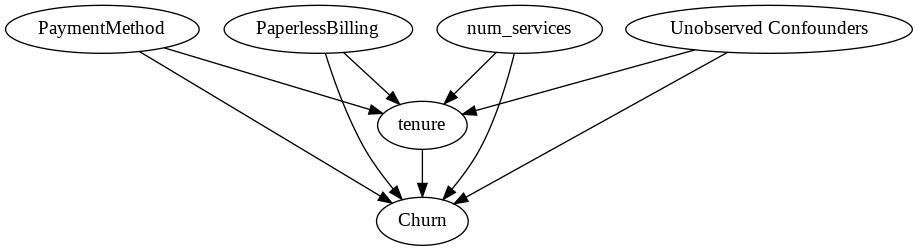

In [41]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [42]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'PaperlessBilling', 'PaymentMethod', 'num_services']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                    
─────────(Expectation(Churn|PaperlessBilling,PaymentMethod,num_services))
d[tenure]                                                                
Estimand assumption 1, Unconfoundedness: If U→{tenure} and U→Churn then P(Churn|tenure,PaperlessBilling,PaymentMethod,num_services,U) = P(Churn|tenure,PaperlessBilling,PaymentMethod,num_services)
### Estimand : 2
Estimand name: iv
No such variable found!



In [43]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(estimate)
print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Churn~tenure+PaperlessBilling+PaymentMethod+num_services


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                    
─────────(Expectation(Churn|PaperlessBilling,PaymentMethod,num_services))
d[tenure]                                                                
Estimand assumption 1, Unconfoundedness: If U→{tenure} and U→Churn then P(Churn|tenure,PaperlessBilling,PaymentMethod,num_services,U) = P(Churn|tenure,PaperlessBilling,PaymentMethod,num_services)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Churn~tenure+PaperlessBilling+PaymentMethod+num_services
## Estimate
Value: -0.0067113894085467085

## Statistical Significance
p-value: <0.001

Causal Estimate is -0.0067113894085467085


In [44]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(res_random)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Churn~tenure+PaperlessBilling+PaymentMethod+num_services+w_random


Refute: Add a Random Common Cause
Estimated effect:(-0.0067113894085467085,)
New effect:(-0.006707045994548244,)



In [45]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Churn~tenure+PaperlessBilling+PaymentMethod+num_services


Refute: Use a subset of data
Estimated effect:(-0.0067113894085467085,)
New effect:(-0.006637033315917196,)

